# CSE 482 - Project

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
myAppToken = 'rEPOXGSegb5AUSutACzeimRkD'
client = Socrata('data.cityofchicago.org', myAppToken)

# this was the most data it would allow us to download
results = client.get('ijzp-q8t2', limit=600000)
df = pd.DataFrame.from_records(results)

In [7]:
data = df.drop(columns=[':@computed_region_awaf_s7ux', ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k', ':@computed_region_bdys_3d7i', 
                      ':@computed_region_43wa_7qmu', ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp', ':@computed_region_d3ds_rm58',
                      'id', 'case_number', 'block', 'iucr', 'domestic', 'beat', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
                       'updated_on', 'latitude', 'longitude', 'location'])
data.head()

,date,primary_type,description,location_description,arrest,district,year
0,2020-04-18T23:50:00.000,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,015,2020
1,2020-04-18T23:48:00.000,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,010,2020
2,2020-04-18T23:47:00.000,ASSAULT,SIMPLE,APARTMENT,False,010,2020
3,2020-04-18T23:45:00.000,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,007,2020
4,2020-04-18T23:41:00.000,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,007,2020


In [8]:

data['month'] = data.apply(lambda row: int(row['date'][:10].split('-')[1]), axis=1)

# data.head()

In [9]:
temp_new = data.groupby(by=['year', 'month', 'primary_type']).count()
temp_new = temp_new.drop(index=['2017'])
# drop 2017 because it isn't complete

In [24]:
temp_new = temp_new.drop(columns=['description', 'location_description', 'arrest', 'district'])
temp_new = temp_new.rename(columns={'date': 'count'})
# # temp_new.head(30)


In [25]:
pivot_test = pd.pivot_table(temp_new, values='count', index=['year', 'month'], columns=['primary_type']).reset_index()
pivot_test.head(30)
# pivot table into usable form

primary_type,year,month,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2018,1,26.0,1416.0,3588.0,952.0,4.0,110.0,1930.0,3.0,...,NaN,1331.0,31.0,NaN,89.0,898.0,77.0,16.0,4850.0,410.0
1,2018,2,14.0,1355.0,3200.0,698.0,6.0,111.0,1672.0,5.0,...,NaN,1262.0,20.0,NaN,78.0,636.0,69.0,14.0,3896.0,306.0
2,2018,3,32.0,1619.0,3958.0,822.0,9.0,115.0,2337.0,2.0,...,NaN,1471.0,38.0,NaN,119.0,738.0,88.0,15.0,4750.0,393.0
3,2018,4,27.0,1641.0,3802.0,942.0,11.0,112.0,2240.0,8.0,...,NaN,1507.0,101.0,1.0,115.0,693.0,85.0,17.0,4996.0,399.0
4,2018,5,33.0,2036.0,4979.0,974.0,15.0,143.0,2670.0,6.0,...,NaN,1604.0,95.0,2.0,124.0,802.0,123.0,24.0,5735.0,542.0
5,2018,6,36.0,1880.0,4640.0,1064.0,14.0,149.0,2589.0,4.0,...,NaN,1512.0,65.0,4.0,137.0,857.0,89.0,18.0,6038.0,499.0
6,2018,7,41.0,1943.0,4883.0,1140.0,13.0,147.0,2726.0,8.0,...,NaN,1572.0,46.0,1.0,116.0,876.0,87.0,27.0,6167.0,550.0
7,2018,8,38.0,1849.0,4613.0,1213.0,17.0,144.0,2636.0,9.0,...,NaN,1501.0,74.0,1.0,121.0,942.0,126.0,15.0,6528.0,561.0
8,2018,9,32.0,1814.0,4351.0,1052.0,20.0,155.0,2287.0,6.0,...,NaN,1322.0,69.0,1.0,112.0,768.0,117.0,12.0,5785.0,487.0
9,2018,10,36.0,1717.0,4302.0,1004.0,19.0,144.0,2521.0,6.0,...,NaN,1385.0,48.0,1.0,112.0,837.0,111.0,15.0,5665.0,452.0


In [26]:
new_temp = pivot_test
for i in range(5, 13):
    #print(i)
    new_temp = new_temp.append({'year': '2020', 'month': str(i)}, ignore_index=True)
new_temp.fillna(value=0, inplace=True)

In [29]:

del df
del temp_new
new_temp.head(36)

primary_type,year,month,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2018,1,26.0,1416.0,3588.0,952.0,4.0,110.0,1930.0,3.0,...,0.0,1331.0,31.0,0.0,89.0,898.0,77.0,16.0,4850.0,410.0
1,2018,2,14.0,1355.0,3200.0,698.0,6.0,111.0,1672.0,5.0,...,0.0,1262.0,20.0,0.0,78.0,636.0,69.0,14.0,3896.0,306.0
2,2018,3,32.0,1619.0,3958.0,822.0,9.0,115.0,2337.0,2.0,...,0.0,1471.0,38.0,0.0,119.0,738.0,88.0,15.0,4750.0,393.0
3,2018,4,27.0,1641.0,3802.0,942.0,11.0,112.0,2240.0,8.0,...,0.0,1507.0,101.0,1.0,115.0,693.0,85.0,17.0,4996.0,399.0
4,2018,5,33.0,2036.0,4979.0,974.0,15.0,143.0,2670.0,6.0,...,0.0,1604.0,95.0,2.0,124.0,802.0,123.0,24.0,5735.0,542.0
5,2018,6,36.0,1880.0,4640.0,1064.0,14.0,149.0,2589.0,4.0,...,0.0,1512.0,65.0,4.0,137.0,857.0,89.0,18.0,6038.0,499.0
6,2018,7,41.0,1943.0,4883.0,1140.0,13.0,147.0,2726.0,8.0,...,0.0,1572.0,46.0,1.0,116.0,876.0,87.0,27.0,6167.0,550.0
7,2018,8,38.0,1849.0,4613.0,1213.0,17.0,144.0,2636.0,9.0,...,0.0,1501.0,74.0,1.0,121.0,942.0,126.0,15.0,6528.0,561.0
8,2018,9,32.0,1814.0,4351.0,1052.0,20.0,155.0,2287.0,6.0,...,0.0,1322.0,69.0,1.0,112.0,768.0,117.0,12.0,5785.0,487.0
9,2018,10,36.0,1717.0,4302.0,1004.0,19.0,144.0,2521.0,6.0,...,0.0,1385.0,48.0,1.0,112.0,837.0,111.0,15.0,5665.0,452.0


In [10]:
df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', header='infer', error_bad_lines=False)
# df2.head()

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [11]:
df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', header='infer', error_bad_lines=False)
# df3.head()

In [12]:
crimes = pd.concat([df2, df3], ignore_index=False, axis=0)

In [13]:
data = crimes.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Domestic', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
                       'Updated On', 'Latitude', 'Longitude', 'Location'])
data.head()

,Unnamed: 0,Date,Primary Type,Description,Location Description,Arrest,District,Year
0,388,10/07/2008 12:39:00 PM,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,3.0,2008
1,835,10/09/2008 03:30:00 AM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,15.0,2008
2,1334,10/09/2008 08:35:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,8.0,2008
3,1907,10/10/2008 02:33:00 AM,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,15.0,2008
4,2436,10/10/2008 12:50:00 PM,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,10.0,2008


In [17]:
del df2
del df3

In [19]:
new_data = data.drop(columns=['Unnamed: 0', ])
del data

In [16]:

new_data.head()

,Date,Primary Type,Description,Location Description,Arrest,District,Year
0,10/07/2008 12:39:00 PM,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,3.0,2008
1,10/09/2008 03:30:00 AM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,15.0,2008
2,10/09/2008 08:35:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,8.0,2008
3,10/10/2008 02:33:00 AM,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,15.0,2008
4,10/10/2008 12:50:00 PM,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,10.0,2008


In [20]:
new_data['month'] = new_data.apply(lambda row: int(row['Date'][:10].split('/')[0]), axis=1)

In [21]:
new_data = new_data.groupby(by=['Year', 'month', 'Primary Type']).count()
new_data = new_data.drop(columns=['Description', 'Location Description', 'Arrest', 'District'])
new_data = new_data.rename(columns={'Date': 'count'})
new_data = pd.pivot_table(new_data, values='count', index=['Year', 'month'], columns=['Primary Type']).reset_index()

In [22]:
new_data.fillna(value=0, inplace=True)
new_data

Primary Type,Year,month,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2008,1,84.0,3508.0,10976.0,3787.0,0.0,268.0,7698.0,2164.0,...,0.0,4790.0,1000.0,0.0,396.0,2536.0,256.0,34.0,13878.0,624.0
1,2008,2,78.0,3495.0,10402.0,3096.0,0.0,187.0,6178.0,1797.0,...,0.0,4421.0,873.0,2.0,393.0,1909.0,180.0,42.0,10929.0,404.0
2,2008,3,110.0,4079.0,12396.0,3498.0,0.0,225.0,8541.0,1975.0,...,0.0,4643.0,857.0,0.0,522.0,2464.0,217.0,22.0,12978.0,620.0
3,2008,4,106.0,4883.0,13444.0,3851.0,0.0,230.0,8825.0,2107.0,...,6.0,4720.0,854.0,0.0,560.0,2432.0,244.0,26.0,14292.0,650.0
4,2008,5,124.0,5016.0,14884.0,4518.0,0.0,222.0,9952.0,1996.0,...,6.0,4602.0,830.0,0.0,592.0,2734.0,264.0,36.0,14981.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2016,9,46.0,1691.0,4312.0,1370.0,2.0,113.0,2844.0,580.0,...,0.0,1326.0,75.0,1.0,127.0,1028.0,86.0,26.0,5708.0,327.0
105,2016,10,54.0,1662.0,4333.0,1308.0,4.0,131.0,2756.0,553.0,...,0.0,1469.0,61.0,0.0,161.0,1149.0,77.0,17.0,5678.0,293.0
106,2016,11,36.0,1418.0,3815.0,1366.0,2.0,102.0,2575.0,482.0,...,0.0,1260.0,64.0,0.0,115.0,1159.0,55.0,13.0,5183.0,280.0
107,2016,12,38.0,1256.0,3433.0,1281.0,4.0,80.0,2086.0,464.0,...,1.0,1331.0,12.0,0.0,95.0,1092.0,43.0,16.0,4772.0,241.0


In [30]:
lst = []
indx = 0
while len(lst) < 97:
    temp = [ new_data['BATTERY'][i + indx] for i in range(12) ]
    lst.append(temp)
    indx += 1

X = pd.DataFrame(lst)
X.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
X.head()


lst = []
indx = 0
while len(lst) < 24:
    temp = [ new_temp['BATTERY'][i + indx] for i in range(12) ]
    lst.append(temp)
    indx += 1

X_temp = pd.DataFrame(lst)
X_temp.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
X_temp.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,3588.0,3200.0,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0
1,3200.0,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0
2,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0
3,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0
4,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0


In [31]:
Y_train = new_data['BATTERY'][12:]
Y_test = new_temp['BATTERY'][12:]
X_train = X
X_test = X_temp
# print(Y_train)
# print(Y_test)
# print(X_train)
# print(X_test)

Test accuracy:
Root mean squared error = 652.1600
R-square = 0.8844


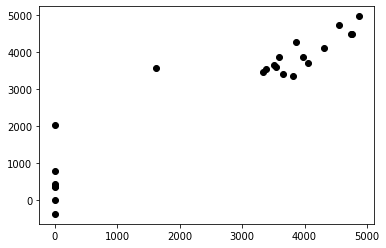

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

y_pred_test = regr.predict(X_test)

print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(Y_test, y_pred_test))

plt.scatter(Y_test, y_pred_test, color='black')

In [34]:
print('Predicted    Actual')
print('_'*22)
for i in range(len(y_pred_test)):
    print('{:8}  |  {}'.format(int(y_pred_test[i]), int(Y_test[i+12])))

Predicted    Actual
______________________
    3652  |  3519
    3454  |  3343
    3703  |  4058
    3858  |  3975
    4502  |  4758
    4496  |  4747
    4972  |  4870
    4736  |  4553
    4108  |  4318
    4274  |  3863
    3404  |  3662
    3347  |  3816
    3867  |  3590
    3534  |  3377
    3593  |  3546
    3563  |  1620
    2022  |  0
    -368  |  0
       9  |  0
     434  |  0
     372  |  0
     789  |  0
     397  |  0
     387  |  0


In [37]:
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Slope Coefficients: [ 0.04047659 -0.33797357  0.5207421  -0.02364527 -0.17952924  0.19964296
 -0.12079136  0.01410421  0.02981009 -0.427325    0.33454637  0.91736617]
Intercept: 62.19460444331435
